# The pypath tutorial collection

On the OmniPath webpage (http://omnipathdb.org/) we had a few tutorials for `pypath`. However over the past years we developed a lot `pypath` and especially recently a number of important points in the interface changed (although we wanted to keep compatibility as much as possible). This is a new comprehensive tutorial which will replace the ones currently on the webpage.

## 1: Quick start – How do I build *OmniPath* data with *pypath*?

``pypath`` provides an easy way to build the OmniPath network as it has been described in our paper. At the first time this will take several minutes, because all data will be downloaded from the original providers. Next time pypath will use the data from its cache directory, so the network will build much faster. If you want to load it even faster, you can save it into a pickle dump.

In [1]:
from pypath import main
from pypath import settings


	=== d i s c l a i m e r ===

	All data accessed through this module,
	either as redistributed copy or downloaded using the
	programmatic interfaces included in the present module,
	are free to use at least for academic research or
	education purposes.
	Please be aware of the licenses of all the datasets
	you use in your analysis, and please give appropriate
	credits for the original sources when you publish your
	results. To find out more about data sources please
	look at `pypath.descriptions` or
	http://omnipathdb.org/info and 
	`pypath.data_formats.urls`.

[2019-06-06 12:41:27] [pypath] 
	- session ID: `o9jzg`
	- working directory: `/home/denes/Dokumentumok/norwich2019`
	- logfile: `/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-o9jzg.log`
	- pypath version: 0.8.13



In [ ]:
pa = main.PyPath()
#pa.load_omnipath() # This is commented out because it takes > 1h 
                    # to run it for the first time due to the vast
                    # amount of data download.
                    # Once you populated the cache it still takes
                    # approx. 30 min to build the entire OmniPath
                    # as the process consists of quite some data
                    # processing. If you dump it in a pickel, you
                    # can load the network in < 1 min

## 2: Quick start – I just want a network quickly and play around with *pypath*

You can find the predefined formats in the ``pypath.data_formats`` module. For example, to load one resource from there, let's say Signor:

In [2]:
from pypath import main
from pypath import data_formats
pa = main.PyPath()
pa.load_resources({'signor': data_formats.pathway['signor']})

Or to load all *activity flow* resources with *literature references:*

In [3]:
from pypath import main
from pypath import data_formats

In [4]:
pa = main.PyPath()
pa.init_network(data_formats.pathway)

Or to load all *activity flow* resources, including the ones without literature references:

In [5]:
pa = main.PyPath()
pa.init_network(data_formats.pathway_all)

## 3: Quick start – How do I build networks from any data with *pypath*?

Here we show how to build a network from your own files. The advantage of building network with pypath is that you don't need to worry about merging redundant elements, neither about different formats and identifiers. Let's say you have two files with network data:

**network1.csv**

    entrezA,entrezB,effect
    1950,1956,inhibition
    5290,207,stimulation
    207,2932,inhibition
    1956,5290,stimulation

**network2.sif**

    EGF + EGFR
    EGFR + PIK3CA
    EGFR + SOS1
    PIK3CA + RAC1
    RAC1 + MAP3K1
    SOS1 + HRAS
    HRAS + MAP3K1
    PIK3CA + AKT1
    AKT1 - GSK3B
    
*Note: you need to create these files in order to load them.*

### 3a: Defining input formats

In [6]:
import pypath
import pypath.input_formats as input_formats

input1 = input_formats.ReadSettings(
    name = 'egf1',
    input = 'network1.csv',
    header = True,
    separator = ',',
    id_col_a = 0,
    id_col_b = 1,
    id_type_a = 'entrez',
    id_type_b = 'entrez',
    sign = (2, 'stimulation', 'inhibition'),
    ncbi_tax_id = 9606,
)

input2 = input_formats.ReadSettings(
    name = 'egf2',
    input = 'network2.sif',
    separator = ' ',
    id_col_a = 0,
    id_col_b = 2,
    id_type_a = 'genesymbol',
    id_type_b = 'genesymbol',
    sign = (1, '+', '-'),
    ncbi_tax_id = 9606,
)

### 3b: Creating PyPath object and loading the 2 test files

In [7]:
inputs = {
    'egf1': input1,
    'egf2': input2
}

pa = main.PyPath()
pa.reload()
pa.init_network(lst = inputs)

## 4: Plotting the network with *igraph*

Here we use the network created above (because it is reasonable size, not like the networks we could get from most of the network databases). Igraph has excellent plotting capabilities built on top of the *cairo* library.

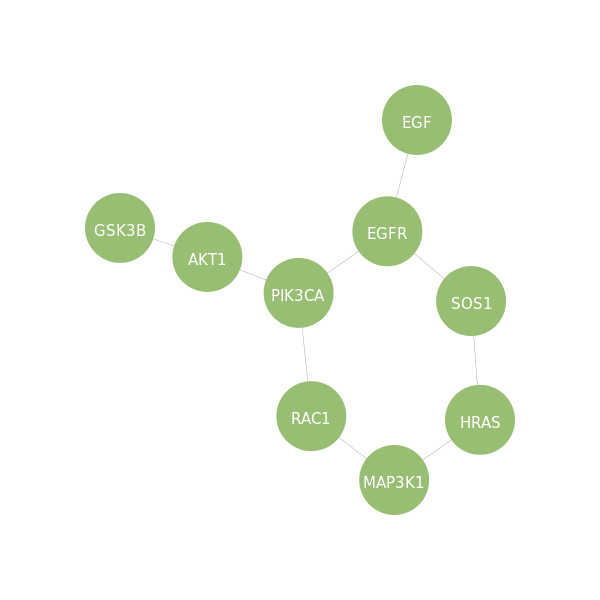

In [8]:
import igraph
plot = igraph.plot(pa.graph, target = 'egf_network.png',
            edge_width = 0.3, edge_color = '#777777',
            vertex_color = '#97BE73', vertex_frame_width = 0,
            vertex_size = 70.0, vertex_label_size = 15,
            vertex_label_color = '#FFFFFF',
            # due to a bug in either igraph or IPython, 
            # vertex labels are not visible on inline plots:
            inline = False, margin = 120)
from IPython.display import Image
Image(filename='egf_network.png')

## 5: Building networks

For this you will need the `PyPath` class from the `pypath.main` module which takes care about building and querying the network. Also you need the `pypath.data_formats` module where you find a number of predefined input settings organized in larger categories (e.g. activity flow, enzyme-substrate, transcriptional regulation, etc). These input settings will tell `pypath` how to download and process the data.

In [20]:
from pypath import main
from pypath import data_formats

For example `data_formats.pathway` is a collection of databases which fit into the activity flow concept, i.e. one protein either stimulates or inhibits the other. It is a dictionary with names as keys and the input settings as values:

In [9]:
data_formats.pathway

{'trip': <pypath.input_formats.ReadSettings at 0x6da2497bc940>,
 'spike': <pypath.input_formats.ReadSettings at 0x6da2497bc9b0>,
 'signalink3': <pypath.input_formats.ReadSettings at 0x6da2497bc9e8>,
 'guide2pharma': <pypath.input_formats.ReadSettings at 0x6da2497bca20>,
 'ca1': <pypath.input_formats.ReadSettings at 0x6da2497bca58>,
 'arn': <pypath.input_formats.ReadSettings at 0x6da2497bcac8>,
 'nrf2': <pypath.input_formats.ReadSettings at 0x6da2497bcb00>,
 'macrophage': <pypath.input_formats.ReadSettings at 0x6da2497bca90>,
 'death': <pypath.input_formats.ReadSettings at 0x6da2497bcb38>,
 'pdz': <pypath.input_formats.ReadSettings at 0x6da2497bcb70>,
 'signor': <pypath.input_formats.ReadSettings at 0x6da2497bcba8>,
 'adhesome': <pypath.input_formats.ReadSettings at 0x6da2497bcbe0>,
 'hpmr': <pypath.input_formats.ReadSettings at 0x6da2497c0908>,
 'cellphonedb': <pypath.input_formats.ReadSettings at 0x6da2497c09e8>,
 'ramilowski2015': <pypath.input_formats.ReadSettings at 0x6da2497c0ac8>

Such a dictionary you can pass to the `init_network` method of the `PyPath` object. Then it will download the data from the original sources, translate the identifiers and merge the networks. Pypath stores all downloaded data in a cache, by default `~/.pypath/cache` in your user's home directory. For this reason when you load a resource for the first time it might take long but next time will be faster as data will be fetched from the cache. First create a `pypath.main.PyPath` object, then build the network:

In [10]:
pa = main.PyPath()
pa.init_network(data_formats.pathway)

You can add more resource sets a similar way:

In [23]:
pa.load_resources(data_formats.ptm)

To load one single resource simply create a one element dict:

In [24]:
pa.load_resources({'matrixdb': data_formats.interaction['matrixdb']})

### 5a: Which network datasets are pre-defined in pypath?

You can find all the pre-defined datasets in the `pypath.data_formats` module. As already we mentined above, the `pathway` dataset contains the literature curated activity flow resources. This was the original focus of pypath and OmniPath, however since then we added a great variety of other kinds of resource definitions. Here we give an overview of these.

* `data_formats.pathway`: activity flow networks with literature references
* `data_formats.activity_flow`: synonym for `pathway`
* `data_formats.pathway_noref`: activity flow networks without literature references
* `data_formats.pathway_all`: all activity flow data
* `data_formats.ptm`: enzyme-substrate interaction networks with literature references
* `data_formats.enzyme_substrate`: synonym for `ptm`
* `data_formats.ptm_noref`: enzyme-substrate networks without literature references
* `data_formats.ptm_all`: all enzyme-substrate data
* `data_formats.interaction`: undirected interactions from both literature curated and high-throughput collections (e.g. IntAct, BioGRID)
* `data_formats.interaction_misc`: undirected, high-scale interaction networks without the constraint of having any literature reference (e.g. the unbiased human interactome screen from the Vidal lab)
* `data_formats.transcription_onebyone`: transcriptional regulation databases (TF-target interactions) with all databases downloaded directly and processed by `pypath`
* `data_formats.transcription`: transcriptional regulation only from the DoRothEA data
* `data_formats.mirna_target`: miRNA-mRNA interactions from literature curated resources
* `data_formats.tf_mirna`: transcriptional regulation of miRNA from literature curated resources
* `data_formats.lncrna_protein`: lncRNA-protein interactions from literature curated datasets
* `data_formats.ligand_receptor`: ligand-receptor interactions from both literature curated and other kinds of resources
* `data_formats.pathwaycommons`: the PathwayCommons database
* `data_formats.reaction`: process description databases; not guaranteed to work at this moment
* `data_formats.reaction_misc`: alternative definitions to load process description databases; not guaranteed to work at this moment
* `data_formats.small_molecule_protein`: signaling interactions between small molecules and proteins

To see the list of the resources in a dataset, you can check the dict keys or the `name` attribute of each element:

In [17]:
data_formats.pathway.keys()

dict_keys(['trip', 'spike', 'signalink3', 'guide2pharma', 'ca1', 'arn', 'nrf2', 'macrophage', 'death', 'pdz', 'signor', 'adhesome', 'hpmr', 'cellphonedb', 'ramilowski2015'])

In [19]:
[resource.name for resource in data_formats.pathway.values()]

['TRIP',
 'SPIKE',
 'SignaLink3',
 'Guide2Pharma',
 'CA1',
 'ARN',
 'NRF2ome',
 'Macrophage',
 'DeathDomain',
 'PDZBase',
 'Signor',
 'Adhesome',
 'HPMR',
 'CellPhoneDB',
 'Ramilowski2015']

## 6: How to access the network

Once you built a network you can use it for various purposes and write your own scripts for further processing or analysis. The network is represented by an `igraph` object ([igraph.org](http://igraph.org/)):

In [25]:
pa.graph

Number of edges and nodes:

In [12]:
pa.ecount, pa.vcount

(22101, 5184)

The edge and vertex sequences you can access in the `es` and `vs` attributes, you can iterate these or index by integers. The edge and vertex attributes you can access by string keys. E.g. get the sources of edge 0:

In [15]:
pa.graph.es[81]['sources']

{'SPIKE', 'SignaLink3'}

## 7: Directions and signs

By default the `igraph` object is undirected but it carries all direction information in Python objects assigned to each edge. Pypath can convert it to a directed `igraph` object, but you still need the `Direction` objects to have the signs, as `igraph` has no signed network representation. Certain methods need the directed `igraph` object and they will automatically create it, but you can create it manually:

In [40]:
pa.get_directed()

You find the directed network in the `pa.dgraph` attribute:

In [41]:
pa.dgraph

Now let's take a look on the `pypath.main.Direction` objects which contain details about directions and signs. First as an example, select a random edge:

In [54]:
edge = pa.graph.es[3241]

The `Direction` object is in the `dirs` edge attribute:

In [55]:
d = edge['dirs']

It has a method to print its content a human readable way:

In [56]:
print(pa.graph.es[3241]['dirs'])

Directions and signs of interaction between Q13489 and Q13546

	Q13489 ===> Q13546 :: SPIKE, SignaLink3
	Q13489 <=== Q13546 :: SignaLink3
	Q13489 =+=> Q13546 :: SPIKE



From this we see the databases phosphoELM and Signor agree that protein `P17252` has an effect on `Q15139` and Signor in addition tells us this effect is stimulatory. However in your scripts you can query the `Direction` objects a number of ways. Each `Direction` object calls the two possible directions either straight or reverse:

In [57]:
d.straight

('Q13489', 'Q13546')

In [58]:
d.reverse

('Q13546', 'Q13489')

It can tell you if one of these directions is supported by any of the network resources:

In [59]:
d.get_dir(d.straight)

True

Or it can return those resources:

In [60]:
d.get_dir(d.straight, sources = True)

{'SPIKE', 'SignaLink3'}

The opposite direction is not supported by any resource:

In [61]:
d.get_dir(d.reverse, sources = True)

{'SignaLink3'}

Similar way the signs can be queried. The returned pair of boolean values mean if the interaction in this direction is stimulatory or inhibitory, respectively.

In [62]:
d.get_sign(d.straight)

[True, False]

Or you can ask whether it is inhibition:

In [63]:
d.is_inhibition(d.straight)

False

Or if the interaction is directed at all:

In [64]:
d.is_directed()

True

Sometimes resources don't agree, for example one tells an interaction is inhibition while according to others it is stimulation; or one tells A effects B and another resource the other way around. Here we preserve all these potentially contradicting information in the `Direction` object and at the end you decide what to do with it depending on your purpose. If you want to get rid of ambiguity there is a method to get a consensus direction and sign which returns the attributes the most resources agree on: 

In [65]:
d.consensus_edges()

[['Q13489', 'Q13546', 'directed', 'positive']]

## 8: Accessing nodes in the network

In `igraph` the vertices are numbered but this numbering can change at certain operations. Instead the we can use the vertex attributes. In `PyPath` for proteins the `name` attribute is UniProt ID by default and the `label` is Gene Symbol.

In [66]:
pa.graph.vs['name'][:5]

['P63000', 'O00161', 'Q9GZU1', 'Q96H20', 'Q9NWB7']

In [67]:
pa.graph.vs['label'][:5]

['RAC1', 'SNAP23', 'MCOLN1', 'SNF8', 'IFT57']

The `PyPath` object offers a number of helper methods to access the nodes by their names. For example, `uniprot` or `up` returns the `igraph.Vertex` for a UniProt ID:

In [68]:
type(pa.up('P00533'))

igraph.Vertex

Similarly `genesymbol` or `gs` for Gene Symbols:

In [36]:
type(pa.gs('ESR1'))

igraph.Vertex

Each of these has a "plural" version:

In [69]:
len(list(pa.gss(['MTOR', 'ATG16L2', 'ULK1'])))

3

And a generic method where you can mix UniProts and Gene Symbols:

In [70]:
len(list(pa.proteins(['MTOR', 'P00533'])))

2

## 9: Querying relationships with our without causality

Above you could see how to query the directions and names of individual edges and nodes. Building on top of these, other methods give a way to query causality, i.e. which proteins are affected by an other one, and which others are its regulators. The example below returns the nodes PIK3CA is stimulated by, the `gs` prefix tells we query by the Gene Symbol:

In [71]:
pa.gs_stimulated_by('PIK3CA')

It returns a so called `_NamedVertexSeq` object, which you can get a series of `igraph.Vertex` objects or Gene Symbols or UniProt IDs from:

In [72]:
list(pa.gs_stimulated_by('PIK3CA').gs())[:5]

['NTRK1', 'SRC', 'GAB1', 'PTPN11', 'NRAS']

In [73]:
list(pa.gs_stimulated_by('PIK3CA').up())[:5]

['P04629', 'P12931', 'Q13480', 'Q06124', 'P01111']

Note, the names of these methods are a bit contraintuitive, the for example the `gs_stimulates` returns the genes stimulated by PIK3CA:

In [74]:
list(pa.gs_stimulates('PIK3CA').gs())[:5]

['MTOR', 'AKT1']

In [75]:
'PIK3CA' in set(pa.affected_by('AKT1').gs())

True

There are many similary methods, `inhibited_by` returns negative regulators, `affected_by` does not consider +/- signs, without `gs_` and `up_` prefixes you can provide either of these identifiers, `neighbors` does not consider the direction. At the end `.gs()` converts the result for a list of Gene Symbols, `up()` to UniProts, `.ids()` to vertex IDs and by default it yields `igraph.Vertex` objects:

In [76]:
list(pa.neighbors('AKT1').ids())[:5]

[0, 32, 38, 50, 69]

Finally, with `neighborhood` methods return the indirect neighborhood in custom number of steps (however size of the neighborhood increases rapidly with number of steps):

In [77]:
print(list(pa.neighborhood('ATG3', 1).gs()))

['ATG3', 'GABARAP', 'ATG5', 'GABARAPL2', 'ATG12', 'ATG7', 'CFLAR', 'MAP1LC3B', 'MAP1LC3A', 'TP63']


In [78]:
print(list(pa.neighborhood('ATG3', 2).gs()))

['ATG3', 'GABARAP', 'ATG5', 'GABARAPL2', 'ATG12', 'ATG7', 'CFLAR', 'MAP1LC3B', 'MAP1LC3A', 'TP63', 'TRPV1', 'CLTC', 'FNBP1', 'NBR1', 'BNIP3L', 'ATG13', 'SQSTM1', 'RB1CC1', 'FYCO1', 'ATG4B', 'ULK1', 'ULK2', 'DVL2', 'OPTN', 'IFIH1', 'BCL2L1', 'ATF4', 'TP73', 'WDFY3', 'CAPN2', 'FADD', 'CAPN1', 'ATG10', 'DDX58', 'DDIT3', 'MAVS', 'ATG16L1', 'ATG16L2', 'TECPR1', 'PPHLN1', 'COX5B', 'UBA5', 'NEK9', 'ATG4A', 'BNIP3', 'NIPSNAP2', 'EP300', 'FOXO1', 'HSF1', 'TAX1BP3', 'ITCH', 'RIPK1', 'FAS', 'NFKB1', 'PRKCB', 'RIPK2', 'TRAF2', 'AR', 'CASP8', 'AKT1', 'MAP3K14', 'CASP10', 'PRKACA', 'MAP1B', 'EGR1', 'MAPK8', 'KEAP1', 'ZKSCAN3', 'TFEB', 'P27791', 'TBC1D5', 'E2F1', 'MAP1A', 'RAB3GAP1', 'HNRNPAB', 'FBXW7', 'ATM', 'TP53', 'MDM2', 'RPS6KB1', 'CDK2', 'IKBKB', 'ATG9A', 'BECN1']


In [79]:
len(list(pa.neighborhood('ATG3', 3).gs()))

1735

In [80]:
len(list(pa.neighborhood('ATG3', 4).gs()))

5344

## 10: Accessing edges by identifiers

Just like nodes also edges can be accessed by identifiers like Gene Symbols. `get_edge` returns an `igraph.Edge` if the edge exists otherwise `None`.

In [81]:
type(pa.get_edge('EGF', 'EGFR'))

igraph.Edge

In [82]:
type(pa.get_edge('EGF', 'P00533'))

igraph.Edge

In [83]:
type(pa.get_edge('EGF', 'AKT1'))

NoneType

In [84]:
print(pa.get_edge('EGF', 'EGFR')['dirs'])

Directions and signs of interaction between P00533 and P01133

	P00533 <=== P01133 :: SPIKE, HPMR, SignaLink3
	P00533 <=+= P01133 :: SPIKE, SignaLink3



## 11: Literature references

Select a random edge and in the `references` attribute you find a list of references:

In [86]:
edge = pa.get_edge( 'MAP1LC3B', 'SQSTM1')
edge['references']

Each reference has a PubMed ID:

In [132]:
edge['references'][0].pmid

'17580304'

In [133]:
edge['references'][0].open()

These 3 references come from 3 different databases, but there must be 2 overlaps between them:

In [87]:
edge['refs_by_source']

{'NRF2ome': {<pypath.refs.Reference at 0x6ee605f6dd98>},
 'ELM': {<pypath.refs.Reference at 0x6ee5fdc8cd98>,
  <pypath.refs.Reference at 0x6ee605f6dd68>}}

## 12: Translating identifiers

The `pypath.mapping` module is for ID translation, most of the time you can simply call the `map_name` method:

In [22]:
from pypath import mapping
mapping.map_name('P00533', 'uniprot', 'genesymbol')

{'EGFR'}

In [89]:
mapping.map_name('8408', 'entrez', 'uniprot')

{'O75385'}

A number of mapping tables are predefined and loaded automatically. However it does not translate in 2 steps if no direct translation table is available. For example Entrez to Gene Symbol you can translate this way:

In [90]:
mapping.map_names(
    mapping.map_name('8408', 'entrez', 'uniprot'),
    'uniprot',
    'genesymbol',
)

{'ULK1'}

By default the `map_name` function returns a `set` because it accounts for ambiguous mapping. However most often the ID translation is unambiguous, and you want to retrieve only one ID. The `map_name0` returns a string, even in case of ambiguity, it returns a random element from the resulted set:

In [23]:
mapping.map_name0('GABARAPL3', 'genesymbol', 'uniprot')

'Q9BY60'

## 13: Enzyme-substrate interactions

The `pypath.ptm` module builds a database of enzyme-substrate interactions.

In [91]:
from pypath import ptm
ptm_db = ptm.PtmAggregator()

Here you got a dictionary with pairs of UniProt IDs as keys and a list of special objects representing enzyme-substrate interactions as values:

In [92]:
print(ptm_db.enz_sub[('Q13177', 'P01236')][0])

Domain-motif interaction:
  Domain in protein Q13177-1:
	Name: unknown
	Range: 0-0
	3D structures: 
  PTM: phosphorylation in protein P01236-1
    Motif: Motif in protein P01236-1:
	Name: unknown
	ELM: unknown
	Range: 200-214
	Regex: unknown
	Instance: LHCLRRDSHKIDNYL


    Residue: Residue S-207 in protein P01236-1
  Data sources: PhosphoSite, phosphoELM, MIMP
  References: 11943200
  3D structures: 



Alternatively the enzyme-substrate interactions can be assigned to network edges:

In [93]:
pa.load_ptms2()

In [97]:
print(pa.graph.es['ptm'][444][0])

Domain-motif interaction:
  Domain in protein P17612-1:
	Name: unknown
	Range: 0-0
	3D structures: 
  PTM: phosphorylation in protein P17600-1
    Motif: unknown

    Residue: Residue S-9 in protein P17600-1
  Data sources: MIMP
  References: 
  3D structures: 



## 14: Complexes

The `pypath.complex` module builds a comprehensive database of protein complexes:

In [160]:
from pypath import complex
co = complex.ComplexAggregator()

This complex is supported by 4 resources and has stoichiometry data, it has 2-2 of both components:

In [166]:
co.complexes['Q13564-Q8TBC4'].sources

{'CORUM', 'Compleat', 'PDB', 'Signor'}

In [167]:
co.complexes['Q13564-Q8TBC4'].components

{'Q13564': 2, 'Q8TBC4': 2}

## 15: Annotations

This module provides various annotations about the function and location of the proteins.

In [33]:
from pypath import annot
a = annot.AnnotationTable()

OmniPath contains annotations from 27 resources. These provide various information about the characteristics of the proteins, e.g. their localization or function. The `AnnotationTable` object loads all annotations by default, optionally you can limit this to certain resources. For example, if you only want to load the pathway membership annotations from SIGNOR, SignaLink, NetPath and KEGG, you can provide the names of the appropriate classes:

In [44]:
pathways = annot.AnnotationTable(
    protein_sources = (
        'SignalinkPathways',
        'KeggPathways',
        'NetpathPathways',
        'SignorPathways',
    )
)

The `AnnotationTable` object provides methods to query all resources together, or build a boolean array out of them. To see all annotations of one protein:

In [34]:
pathways.all_annotations('P00533')

[SignalinkPathway(pathway='WNT'),
 SignalinkPathway(pathway='TNF/Apoptosis'),
 SignalinkPathway(pathway='RTK'),
 SignalinkPathway(pathway='IIP'),
 KeggPathway(pathway='Choline metabolism in cancer'),
 KeggPathway(pathway='Non-small cell lung cancer'),
 KeggPathway(pathway='HIF-1 signaling pathway'),
 KeggPathway(pathway='Breast cancer'),
 KeggPathway(pathway='Human papillomavirus infection'),
 KeggPathway(pathway='ErbB signaling pathway'),
 KeggPathway(pathway='Estrogen signaling pathway'),
 KeggPathway(pathway='Adherens junction'),
 KeggPathway(pathway='Phospholipase D signaling pathway'),
 KeggPathway(pathway='Relaxin signaling pathway'),
 KeggPathway(pathway='Epithelial cell signaling in Helicobacter pylori infection'),
 KeggPathway(pathway='Glioma'),
 KeggPathway(pathway='Hepatocellular carcinoma'),
 KeggPathway(pathway='Prostate cancer'),
 KeggPathway(pathway='Endometrial cancer'),
 KeggPathway(pathway='Human cytomegalovirus infection'),
 KeggPathway(pathway='EGFR tyrosine kinase 

In [46]:
pathways.create_dataframe = True
pathways.make_dataframe()

In [47]:
pathways.df

,SignaLink3,SignaLink3__,SignaLink3__BCR,SignaLink3__GPCR,SignaLink3__HH,SignaLink3__HIPPO,SignaLink3__Hedgehog(core),SignaLink3__Hedgehog(non-core),SignaLink3__Hippo,SignaLink3__IIP,...,CORUM_Funcat__vacuole or lysosome,CORUM_Funcat__vascular organs,CORUM_Funcat__vesicle formation,CORUM_Funcat__vesicle fusion,CORUM_Funcat__vesicle recycling,"CORUM_Funcat__vesicular transport (Golgi network, etc.)",CORUM_Funcat__vessels,CORUM_Funcat__visual transduction,CORUM_Funcat__water homeostasis,HPMR_complex
A0A024RBG1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6H9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6I0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6I1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6I4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6I9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6J1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6J6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6J9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A0A075B6K0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `AnnotationTable` object contains the resource specific annotation objects:

In [48]:
a.annots

{'CellPhoneDB': <pypath.annot.CellPhoneDB at 0x6da1f8add470>,
 'Locate': <pypath.annot.Locate at 0x6da2470594e0>,
 'GO_Intercell': <pypath.annot.GOIntercell at 0x6da1f82a0400>,
 'Adhesome': <pypath.annot.Adhesome at 0x6da1f82a0080>,
 'NetPath': <pypath.annot.NetpathPathways at 0x6da1f82a0f28>,
 'ComPPI': <pypath.annot.Comppi at 0x6da1f8932eb8>,
 'Signor': <pypath.annot.SignorPathways at 0x6da23b1a74a8>,
 'Ramilowski2015': <pypath.annot.Ramilowski2015 at 0x6da1f84ec588>,
 'Ramilowski_location': <pypath.annot.Ramilowski2015Location at 0x6da23baaf438>,
 'Exocarta': <pypath.annot.Exocarta at 0x6da224b4b2b0>,
 'Matrisome': <pypath.annot.Matrisome at 0x6da1f8026ac8>,
 'Integrins': <pypath.annot.Integrins at 0x6da1f8031978>,
 'CSPA': <pypath.annot.CellSurfaceProteinAtlas at 0x6da1f8031630>,
 'HPA': <pypath.annot.HumanProteinAtlas at 0x6da1f3b9ef28>,
 'Surfaceome': <pypath.annot.Surfaceome at 0x6da1f89f25c0>,
 'HPMR': <pypath.annot.HumanPlasmaMembraneReceptome at 0x6da1e7e58d30>,
 'Zhong2015':

For each of these you can query the names of the fields, their possible values and the set of proteins annotated with any combination of the values:

In [49]:
matrisome = a.annots['Matrisome']

In [50]:
matrisome.get_names()

('mainclass', 'subclass', 'subsubclass')

In [52]:
matrisome.get_values('subclass')

{'Collagens',
 'ECM Glycoproteins',
 'ECM Regulators',
 'ECM-affiliated Proteins',
 'Proteoglycans',
 'Secreted Factors',
 'n/a'}

In [53]:
matrisome.get_subset(subclass = 'Collagens')

{'A2A2Y8',
 'A2A352',
 'A2AAS7',
 'A6NCT7',
 'A6NDR9',
 'A6NEQ6',
 'A6NMZ7',
 'A6PVD9',
 'A8MWQ5',
 'A8MXH5',
 'A8TX70',
 'B1AKJ1',
 'B1AKJ3',
 'B4DZ39',
 'B7ZBI4',
 'B7ZBI5',
 'C9JBL3',
 'C9JH44',
 'C9JMN2',
 'C9JNG9',
 'C9JPW4',
 'C9JTN9',
 Complex Collagen type I homotrimer: COMPLEX:P02452,
 Complex Collagen type I trimer: COMPLEX:P02452-P08123,
 Complex Collagen type II trimer: COMPLEX:P02458,
 Complex Collagen type XI trimer variant 1: COMPLEX:P02458-P12107-P13942,
 Complex: COMPLEX:P02458-P20908-P25067-P29400,
 Complex: COMPLEX:P02458-P25067-P29400,
 Complex Collagen type III trimer: COMPLEX:P02461,
 Complex: COMPLEX:P02462,
 Complex Collagen type IV trimer variant 1: COMPLEX:P02462-P08572,
 Complex Collagen type XI trimer variant 2: COMPLEX:P05997-P12107,
 Complex Collagen type XI trimer variant 3: COMPLEX:P05997-P12107-P20908,
 Complex Collagen type V trimer variant 1: COMPLEX:P05997-P20908,
 Complex Collagen type V trimer variant 2: COMPLEX:P05997-P20908-P25940,
 Complex: COMP

## 16: Gene Ontology

`pypath.go` is an almost standalone module for management of the Gene Ontology tree and annotations. The main objects here are `GeneOntology` and `GOAnnotation`. The former represents the ontology tree, i.e. terms and their relationships, the latter their assignment to gene products. Both provides many versatile methods for querying.

In [54]:
from pypath import go
goa = go.GOAnnotation()

In [55]:
goa.ontology # the GeneOntology object

In [56]:
goa # the GOAnnotation object

Among many others, the most versatile method is `select` which is able to select the annotated gene products by various expressions built from GO terms or IDs. It understands `AND`, `OR`, `NOT` and parentheses.

In [58]:
query = """(cell surface OR
        external side of plasma membrane OR
        extracellular region) AND
        (regulation of transmembrane transporter activity OR
        channel regulator activity)"""
result = goa.select(query)
print(list(result)[:7])

['O15400', 'P62258', 'P0DP23', 'Q8N335', 'P05771', 'Q9Y6J6', 'P57796']


In [69]:
goa.ontology.get_all_descendants('GO:0005576')

{'GO:0001507',
 'GO:0001527',
 'GO:0003351',
 'GO:0003355',
 'GO:0005201',
 'GO:0005576',
 'GO:0005577',
 'GO:0005582',
 'GO:0005583',
 'GO:0005584',
 'GO:0005585',
 'GO:0005586',
 'GO:0005587',
 'GO:0005588',
 'GO:0005590',
 'GO:0005591',
 'GO:0005592',
 'GO:0005595',
 'GO:0005596',
 'GO:0005599',
 'GO:0005601',
 'GO:0005602',
 'GO:0005604',
 'GO:0005606',
 'GO:0005607',
 'GO:0005608',
 'GO:0005609',
 'GO:0005610',
 'GO:0005611',
 'GO:0005612',
 'GO:0005614',
 'GO:0005615',
 'GO:0005616',
 'GO:0006858',
 'GO:0006859',
 'GO:0006860',
 'GO:0009519',
 'GO:0010367',
 'GO:0016914',
 'GO:0016942',
 'GO:0020003',
 'GO:0020004',
 'GO:0020005',
 'GO:0020006',
 'GO:0030020',
 'GO:0030021',
 'GO:0030023',
 'GO:0030197',
 'GO:0030345',
 'GO:0030934',
 'GO:0030935',
 'GO:0030938',
 'GO:0031012',
 'GO:0031395',
 'GO:0032311',
 'GO:0032579',
 'GO:0033165',
 'GO:0033166',
 'GO:0034358',
 'GO:0034359',
 'GO:0034360',
 'GO:0034361',
 'GO:0034362',
 'GO:0034363',
 'GO:0034364',
 'GO:0034365',
 'GO:00343

## 17: Protein complexes

The `pypath.complex` module builds a non-redundant list of complexes from 10 original resources. Complexes are unique considering their set of components, and optionally carry stoichiometry information.

In [71]:
from pypath import complex
complexdb = complex.get_db()

In [72]:
complexdb

To retrieve all complexes containing a specific protein, here MTOR:

In [92]:
complexdb.proteins['P42345']

{Complex: COMPLEX:P23443-P42345,
 Complex: COMPLEX:P42345,
 Complex: COMPLEX:P42345-P62942,
 Complex: COMPLEX:P42345-P83436-Q14746-Q8WTW3-Q96JB2-Q96MW5-Q9H9E3-Q9UP83-Q9Y2V7,
 Complex: COMPLEX:P42345-Q00688,
 Complex: COMPLEX:P42345-Q02790,
 Complex: COMPLEX:P42345-Q13451,
 Complex: COMPLEX:P42345-Q13535-Q92616-Q9UIA9,
 Complex: COMPLEX:P42345-Q13535-Q96QU8,
 Complex: COMPLEX:P42345-Q13535-Q96QU8-Q9UIA9,
 Complex: COMPLEX:P42345-Q13541-Q15382-Q8N122-Q9BVC4,
 Complex: COMPLEX:P42345-Q13541-Q8N122-Q9BVC4,
 Complex mTORC2 complex: COMPLEX:P42345-Q6R327-Q9BPZ7-Q9BVC4,
 Complex mTOR complex (MTOR, RICTOR, MLST8): COMPLEX:P42345-Q6R327-Q9BVC4,
 Complex mTOR complex (MTOR, RAPTOR): COMPLEX:P42345-Q8N122,
 Complex mTORC1: COMPLEX:P42345-Q8N122-Q8TB45-Q96B36-Q9BVC4,
 Complex mTOR complex (MTOR, RAPTOR, MLST8): COMPLEX:P42345-Q8N122-Q9BVC4,
 Complex: COMPLEX:P42345-Q96B36-Q9BVC4,
 Complex: COMPLEX:P42345-Q9BVC4,
 Complex: COMPLEX:P42345-Q9BVC4-Q9UJ68}

Take a closer look on one complex object. The hash of the is equivalent with the string representation below, where the UniProt IDs are unique and alphabetically sorted. Hence you can look up complexes using strings as keys despite the dict keys are indeed `pypath.intera.Complex` objects:

In [100]:
cplex = complexdb.complexes['COMPLEX:P42345-Q13451']

In [101]:
cplex.components # stoichiometry

{'Q13451': 2, 'P42345': 2}

In [102]:
cplex.sources # resources

{'PDB'}

## 18: Saving datasets as pickles

The large datasets above are compiled from many resources. Even if these are already available in the cache, the data processing often takes longer than convenient, e.g. few minutes. Most of the data integration objects in `pypath` provide methods to save and load their contents as pickle dumps.

In [ ]:
# for `pypath.main.PyPath` objects:
pa.save_network('mynetwork.pickle') # save
pa.init_network(pfile = 'mynetwork.pickle') # load
# for `pypath.annot.AnnotationTable` objects:
a.save_to_pickle('myannots.pickle')
a = annot.AnnotationTable(pickle_file = 'myannots.pickle')
# for `pypath.complex.ComplexAggregator` objects:
complexdb.save_to_pickle('mycomplexes.pickle')
complexdb = complex.ComplexAggregator(pickle_file = 'mycomplexes.pickle')